In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv("Summary of Weather.csv")
weather.head()

C:\Users\User\AppData\Local\Temp\ipykernel_7980\1093861182.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("Summary of Weather.csv")


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [4]:
from sklearn.model_selection import train_test_split

feature = weather[["MinTemp"]]
target = weather[["MaxTemp"]]

feature_weather_train, feature_weather_test, target_weather_train, target_weather_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

#define model
base_reg = LinearRegression()

#train the model
x_weather_train = feature_weather_train.to_numpy()
y_weather_train = target_weather_train.to_numpy()
y_weather_train = y_weather_train.reshape(len(y_weather_train,))

base_reg.fit(x_weather_train,y_weather_train)

LinearRegression()

In [6]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_weather_train
model = base_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,10.688362
1,MinTemp,0.918890


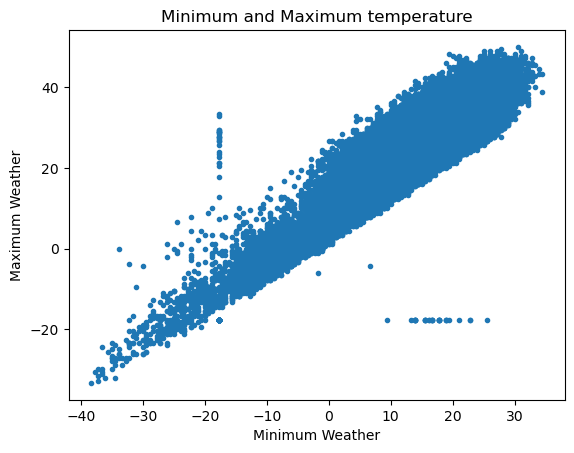

In [7]:
plt.scatter(feature, target, marker = '.')
plt.title('Minimum and Maximum temperature')
plt.xlabel('Minimum Weather')
plt.ylabel('Maximum Weather')
plt.show()


It's clear that Minimum and Maximum weather have a liniear-line correlation
So, we can try to predict using linear regression model

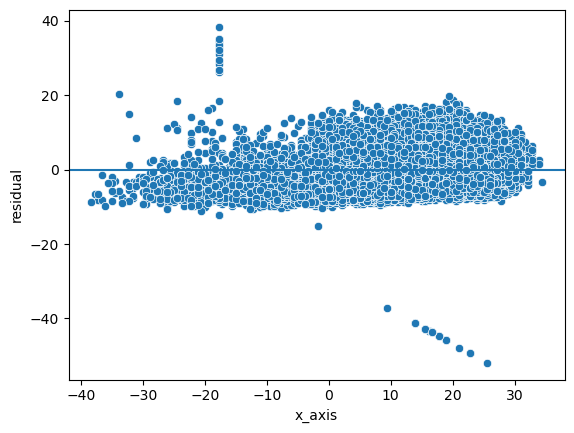

In [8]:
# calculate residuals
y_predict_train = base_reg.predict(x_weather_train)
residual = y_weather_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'x_axis': x_weather_train.reshape(len(x_weather_train,)),
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

From the plot above we can conclude
1. Don't have a staight line relationship between feature and target.
2. Have a constant variance with a little outlier
3. Have an Independent observations.

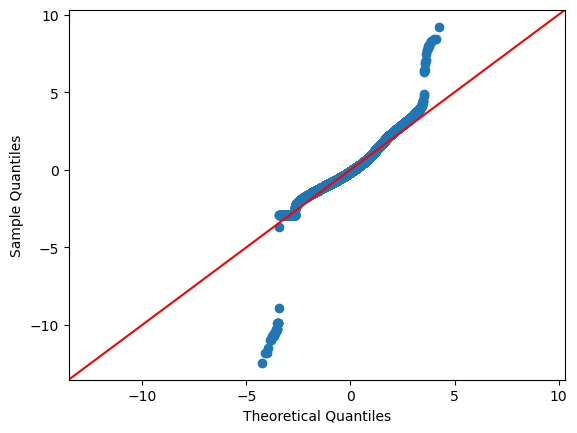

In [9]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

Residuals are totally not normally distributed

## Model Evaluation

In [11]:
from sklearn import metrics

In [12]:
yhat = base_reg.predict(feature_weather_test)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [13]:
print('MAE is %f' % metrics.mean_absolute_error(target_weather_test, yhat))
print('MSE is %f' % metrics.mean_squared_error(target_weather_test, yhat))
print('RMSE is %f' % np.sqrt(metrics.mean_squared_error(target_weather_test, yhat)))
print('R2SCORE is %f' % metrics.r2_score(target_weather_test, yhat))

MAE is 3.177483
MSE is 17.115311
RMSE is 4.137065
R2SCORE is 0.772155


Since the R2 Score is 77%, not very good but enough for making a prediction!


In [20]:
# Test the model
min_weather = [[24]]
min_weather2 = [[25]]
min_weather3 = [[26]]


test = base_reg.predict(min_weather)
test2 = base_reg.predict(min_weather2)
test3 = base_reg.predict(min_weather3)

print(f"Prediksi jika suhu minimum adalah {min_weather[0]} maka suhu maksimal : {test[0]} derajat")
print(f"Prediksi jika suhu minimum adalah {min_weather2[0]} maka suhu maksimal : {test2[0]} derajat")
print(f"Prediksi jika suhu minimum adalah {min_weather3[0]} maka suhu maksimal : {test3[0]} derajat")

Prediksi jika suhu minimum adalah [24] maka suhu maksimal : 32.74172176356328 derajat
Prediksi jika suhu minimum adalah [25] maka suhu maksimal : 33.66061175846697 derajat
Prediksi jika suhu minimum adalah [26] maka suhu maksimal : 34.579501753370664 derajat


It's maybe weather on WW2, but surprisingly it can predict the weather in Jakarta, Indonesia on 2024